# Problem 01

```
미니 프로젝트
1. 신생아 이름 데이터를 이용하여 다음과 같은 분석을 진행하시오.
-유명인, 성서에 등장하는 이름 등 외부 이름을 이용하여 이름 유행을 분석
-각 연도별 가장 인기 있는 이름을 분석
-다음 이름의 연도별 순위 조사(john, sophia, michael, daniel, carter)
-각 연도별, 성별 상위 50% 이름을 구성하는 알파벳 문자 중, 자음과 모음의 비율 분석
-가장 긴 이름과 가장 짧은 이름을 출력
-시각화도 함께 ...
```

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

pieces=[]
for year in range(1880,2011):
    path="names/names/yob%d.txt" % year
    #print(path)
    df=pd.read_csv(path, names=['name','sex','births'])
    df['year']=year
    pieces.append(df)
    
names=pd.concat(pieces, ignore_index=True)
names.head(6)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880


In [118]:
df = names.pivot_table('births',index='name',
                 columns=['sex', 'year'], aggfunc='sum')
df.head(6)

sex          F                                               ...    M        \
year      1880 1881 1882 1883 1884 1885 1886 1887 1888 1889  ... 2001  2002   
name                                                         ...              
Aaban      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   NaN   
Aabid      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   NaN   
Aabriella  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   NaN   
Aadam      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  11.0   
Aadan      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   NaN   
Aadarsh    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  7.0  10.0   

sex                                                        
year       2003  2004  2005  2006  2007  2008  2009  2010  
name                                                       
Aaban       NaN   NaN   NaN   NaN   5.0   NaN   6.0   9.0  
Aabid       5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Aabriella   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Aadam      10.0   9.0   6.0   9.0   8.0   6.0   9.0   7.0  
Aadan       5.0   NaN   NaN   NaN   8.0  22.0  23.0  11.0  
Aadarsh    10.0  11.0  10.0  14.0  13.0  13.0  16.0   NaN  

[6 rows x 262 columns]

In [132]:
def max_name(df):
    pass
df['F'][1880].max()

7065.0

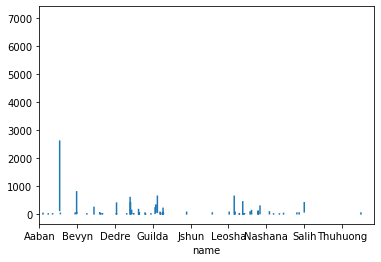

In [140]:
df['F'][1880].plot()

In [148]:
df['F'][1880].sort_values(ascending=False).index[0]

'Mary'

In [156]:
def popular_name_by_year(df,sex='F',start_year = 1880, end_year = 2010):
    data = {}
    for i in range(start_year,end_year+1):
        name = df[sex][i].sort_values(ascending=False).index[0]
        data[i]= name
    return data

popular_name_dict = popular_name_by_year(df,'F')
popular_name_dict

{1880: 'Mary',
 1881: 'Mary',
 1882: 'Mary',
 1883: 'Mary',
 1884: 'Mary',
 1885: 'Mary',
 1886: 'Mary',
 1887: 'Mary',
 1888: 'Mary',
 1889: 'Mary',
 1890: 'Mary',
 1891: 'Mary',
 1892: 'Mary',
 1893: 'Mary',
 1894: 'Mary',
 1895: 'Mary',
 1896: 'Mary',
 1897: 'Mary',
 1898: 'Mary',
 1899: 'Mary',
 1900: 'Mary',
 1901: 'Mary',
 1902: 'Mary',
 1903: 'Mary',
 1904: 'Mary',
 1905: 'Mary',
 1906: 'Mary',
 1907: 'Mary',
 1908: 'Mary',
 1909: 'Mary',
 1910: 'Mary',
 1911: 'Mary',
 1912: 'Mary',
 1913: 'Mary',
 1914: 'Mary',
 1915: 'Mary',
 1916: 'Mary',
 1917: 'Mary',
 1918: 'Mary',
 1919: 'Mary',
 1920: 'Mary',
 1921: 'Mary',
 1922: 'Mary',
 1923: 'Mary',
 1924: 'Mary',
 1925: 'Mary',
 1926: 'Mary',
 1927: 'Mary',
 1928: 'Mary',
 1929: 'Mary',
 1930: 'Mary',
 1931: 'Mary',
 1932: 'Mary',
 1933: 'Mary',
 1934: 'Mary',
 1935: 'Mary',
 1936: 'Mary',
 1937: 'Mary',
 1938: 'Mary',
 1939: 'Mary',
 1940: 'Mary',
 1941: 'Mary',
 1942: 'Mary',
 1943: 'Mary',
 1944: 'Mary',
 1945: 'Mary',
 1946: 'Ma

In [213]:
popular_name = pd.DataFrame(popular_name_dict.values(), 
                             index = popular_name_dict.keys())
popular_name.head()

,0
1880,Mary
1881,Mary
1882,Mary
1883,Mary
1884,Mary


In [184]:
# popular_name.rename(columns = {0:'name'})
popular_name.columns = ['name']
popular_name.head()
# 연도별 가장 유명한 이름 구하기

,name
1880,Mary
1881,Mary
1882,Mary
1883,Mary
1884,Mary


In [190]:
df_by_name = names.pivot_table('births', index=['year','sex'],
                             columns=['name'], aggfunc='sum')
df_by_name.head()

name      Aaban  Aabid  Aabriella  Aadam  Aadan  Aadarsh  Aaden  Aadesh  \
year sex                                                                  
1880 F      NaN    NaN        NaN    NaN    NaN      NaN    NaN     NaN   
     M      NaN    NaN        NaN    NaN    NaN      NaN    NaN     NaN   
1881 F      NaN    NaN        NaN    NaN    NaN      NaN    NaN     NaN   
     M      NaN    NaN        NaN    NaN    NaN      NaN    NaN     NaN   
1882 F      NaN    NaN        NaN    NaN    NaN      NaN    NaN     NaN   

name      Aadhav  Aadhavan  ...  Zyrus  Zysean  Zyshaun  Zyshawn  Zyshon  \
year sex                    ...                                            
1880 F       NaN       NaN  ...    NaN     NaN      NaN      NaN     NaN   
     M       NaN       NaN  ...    NaN     NaN      NaN      NaN     NaN   
1881 F       NaN       NaN  ...    NaN     NaN      NaN      NaN     NaN   
     M       NaN       NaN  ...    NaN     NaN      NaN      NaN     NaN   
1882 F       NaN       NaN  ...    NaN     NaN      NaN      NaN     NaN   

name      Zyshonne  Zytavious  Zyvion  Zyyanna  Zzyzx  
year sex                                               
1880 F         NaN        NaN     NaN      NaN    NaN  
     M         NaN        NaN     NaN      NaN    NaN  
1881 F         NaN        NaN     NaN      NaN    NaN  
     M         NaN        NaN     NaN      NaN    NaN  
1882 F         NaN        NaN     NaN      NaN    NaN  

[5 rows x 88496 columns]

In [209]:
df_by_name['Mary'].unstack('sex')['F']

year
1880    7065.0
1881    6919.0
1882    8149.0
1883    8012.0
1884    9217.0
         ...  
2006    4073.0
2007    3665.0
2008    3478.0
2009    3132.0
2010    2826.0
Name: F, Length: 131, dtype: float64

year
1880     9655.0
1881     8769.0
1882     9557.0
1883     8894.0
1884     9387.0
         ...   
2006    15140.0
2007    14405.0
2008    13273.0
2009    12048.0
2010    11424.0
Name: M, Length: 131, dtype: float64

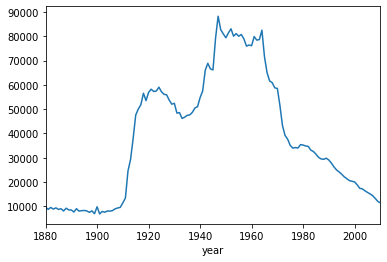

In [212]:
# 이름 트랜드 분석
def search_name_trend(df_by_name,name='Mary',sex='F', start_year = 1880, end_year = 2010):
    df_by_name = df_by_name.loc[start_year:end_year+1]
    result = df_by_name[name].unstack()[sex]
    result.plot()
    return result

search_name_trend(df_by_name, 'John', 'M')

In [256]:
df_by_name.loc[1880:2010].fillna(0).rank(axis=1, ascending=False)['Sophia']

year  sex
1880  F        117.5
      M      44777.5
1881  F        130.5
      M      44747.0
1882  F        116.0
              ...   
2008  M       6955.5
2009  F          4.0
      M       8624.0
2010  F          2.0
      M       3910.0
Name: Sophia, Length: 262, dtype: float64

919.0

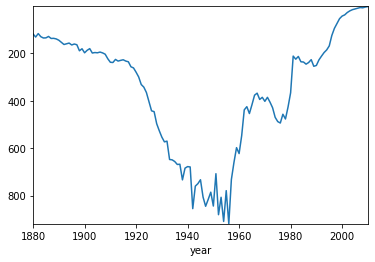

In [264]:
rank = df_by_name.fillna(0).rank(axis=1, ascending=False)['Sophia'].unstack()['F']
bottom = rank.max()
rank.plot(ylim=(bottom,1))
bottom

In [601]:
df_by_name[['John','Joy','Mike']].fillna(0)

name         John    Joy   Mike
year sex                       
1880 F       46.0    0.0    0.0
     M     9655.0    0.0   95.0
1881 F       26.0    0.0    0.0
     M     8769.0    0.0   44.0
1882 F       40.0    0.0    0.0
...           ...    ...    ...
2008 M    13273.0    8.0  292.0
2009 F       11.0  577.0    0.0
     M    12048.0   10.0  260.0
2010 F        9.0  615.0    0.0
     M    11424.0   16.0  239.0

[262 rows x 3 columns]

In [602]:
df_by_name[['John','Joy','Mike']].fillna(0).rank(axis=1, asc)

name      John  Joy  Mike
year sex                 
1880 F     3.0  1.5   1.5
     M     3.0  1.0   2.0
1881 F     3.0  1.5   1.5
     M     3.0  1.0   2.0
1882 F     3.0  1.5   1.5
...        ...  ...   ...
2008 M     3.0  1.0   2.0
2009 F     2.0  3.0   1.0
     M     3.0  1.0   2.0
2010 F     2.0  3.0   1.0
     M     3.0  1.0   2.0

[262 rows x 3 columns]

In [350]:
def rank_of_name(df_by_name,name='Mary',sex='F', start_year = 1880, end_year = 2010):
    df_by_name = df_by_name.loc[start_year:end_year+1]
    ranking = df_by_name.fillna(0).rank(axis=1, ascending=False)
    name_ranking = ranking[name].unstack()[sex]
    name_ranking = name_ranking.map(lambda x : x if x < 9000 else 9000)
    return name_ranking.rename(name)

rank_of_name(df_by_name, 'Carter', 'F')

year
1880    9000.0
1881    9000.0
1882    9000.0
1883    9000.0
1884    9000.0
         ...  
2006    1702.0
2007    2005.5
2008    2007.0
2009    1808.0
2010    1432.5
Name: Carter, Length: 131, dtype: float64

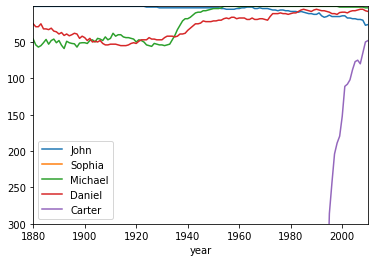

In [604]:
check_name = "john, sophia, michael, daniel, carter".split(', ')
check_name = list(map(lambda x : x.capitalize(),check_name))
check_name
                  
for name in check_name:
    rank_of_name(df_by_name, name=name, sex='M').plot(ylim=(300,1),legend=True)
    

In [364]:
def add_prop(group):
    group['prop'] = group.births/group.births.sum()
    return group
name_props = names.groupby(['year','sex']).apply(add_prop)
name_props.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [365]:
name_props.groupby(['year','sex'])['prop'].cumsum()

0          0.077643
1          0.106261
2          0.128274
3          0.149583
4          0.168771
             ...   
1690779    0.999989
1690780    0.999992
1690781    0.999995
1690782    0.999997
1690783    1.000000
Name: prop, Length: 1690784, dtype: float64

In [371]:
def get_qc(group,q=0.5):
    group['p_csum'] = group.prop.cumsum()
    return group

name_csum = name_props.groupby(['year','sex']).apply(get_qc)
name_csum.head()

,name,sex,births,year,prop,p_csum
0,Mary,F,7065,1880,0.077643,0.077643
1,Anna,F,2604,1880,0.028618,0.106261
2,Emma,F,2003,1880,0.022013,0.128274
3,Elizabeth,F,1939,1880,0.021309,0.149583
4,Minnie,F,1746,1880,0.019188,0.168771


In [410]:
top50percent = name_csum[name_csum.p_csum < 0.5]
top50percent.head()

,name,sex,births,year,prop,p_csum
0,Mary,F,7065,1880,0.077643,0.077643
1,Anna,F,2604,1880,0.028618,0.106261
2,Emma,F,2003,1880,0.022013,0.128274
3,Elizabeth,F,1939,1880,0.021309,0.149583
4,Minnie,F,1746,1880,0.019188,0.168771


In [529]:
# 이름 소문자화
def count_vowel(string):
    vowels = list("aeiou")
    cnt = 0
    for vowel in vowels:
        cnt += string.count(vowel)
    return cnt
def con_vol(data):
    data['len'] = data.name.map(len)
    data['vol'] = data.name.map(lambda x : count_vowel(x))
    data['con'] = data.len - data.vol
    return data
top50percent.name = top50percent.name.map(lambda x : x.lower())
top50_convol = con_vol(top50percent)
top50_convol.head()

,name,sex,births,year,prop,p_csum,vol,con,len
0,mary,F,7065,1880,0.077643,0.077643,1,3,4
1,anna,F,2604,1880,0.028618,0.106261,2,2,4
2,emma,F,2003,1880,0.022013,0.128274,2,2,4
3,elizabeth,F,1939,1880,0.021309,0.149583,4,5,9
4,minnie,F,1746,1880,0.019188,0.168771,3,3,6


In [530]:
yearly = top50_convol.groupby(['year','sex'])['vol','con'].sum()
v_c_sum = yearly.sum(axis = 1)
yearly['vol_ratio'] = yearly.vol / v_c_sum
yearly['con_ratio'] = yearly.con / v_c_sum
yearly

vol  con  vol_ratio  con_ratio
year sex                                
1880 F     97  109   0.470874   0.529126
     M     24   50   0.324324   0.675676
1881 F     92  109   0.457711   0.542289
     M     24   50   0.324324   0.675676
1882 F     95  109   0.465686   0.534314
...       ...  ...        ...        ...
2008 M    245  374   0.395800   0.604200
2009 F    652  817   0.443839   0.556161
     M    252  384   0.396226   0.603774
2010 F    665  834   0.443629   0.556371
     M    263  397   0.398485   0.601515

[262 rows x 4 columns]

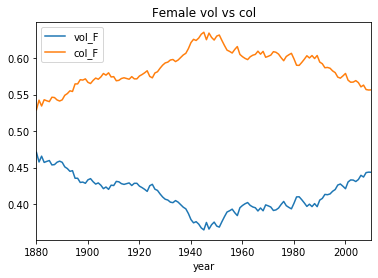

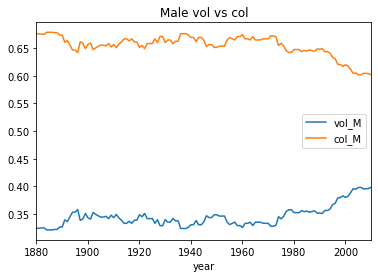

In [531]:
final = yearly.loc[:,['vol_ratio','con_ratio']].unstack()
vol_F = final.vol_ratio.F.rename('vol_F')
col_F = final.con_ratio.F.rename('col_F')
vol_M = final.vol_ratio.M.rename('vol_M')
col_M = final.con_ratio.M.rename('col_M')

# female = pd.concat(a,b)
pd.DataFrame([vol_F,col_F]).reindex().T.plot(title='Female vol vs col')
pd.DataFrame([vol_M,col_M]).reindex().T.plot(title='Male vol vs col')

In [592]:
min_len = top50_convol.name.map(len).min()
max_len = top50_convol.name.map(len).max()
min_name = top50_convol[top50_convol.name.map(len)==min_len].name.values
max_name = top50_convol[top50_convol.name.map(len)==max_len].name.values
print(set(min_name))
print(set(max_name))

{'ava', 'ann', 'zoe', 'mya', 'eva', 'kim', 'ana', 'joe', 'max', 'ian', 'eli', 'ada', 'ida', 'amy', 'roy', 'mia'}
{'christopher'}
